In [1]:
import matplotlib.pyplot as plt
import mplcyberpunk

import pandas as pd

plt.style.use("cyberpunk")

In [2]:
series = pd.read_csv("./datas/test_dataset.csv", sep = ",", index_col="time_stamp")
series.index = pd.to_datetime(series.index)

STUDIED_COLUMN = "wind_speed"
train = series.loc[:, STUDIED_COLUMN].iloc[-168*4:-168]
test = series.loc[:, STUDIED_COLUMN].iloc[-168:]

In [3]:
from src.estimator import FeatureBasedEstimator
from sklearn.ensemble import GradientBoostingRegressor

estimator_ = FeatureBasedEstimator(GradientBoostingRegressor(n_estimators=250), horizon = test.shape[0], seasonal_period=168, freq = "H")
estimator_.preprocess_and_fit(train)

## Forecasting

In [ ]:
preds = estimator_.forecast()

<Figure size 640x480 with 0 Axes>

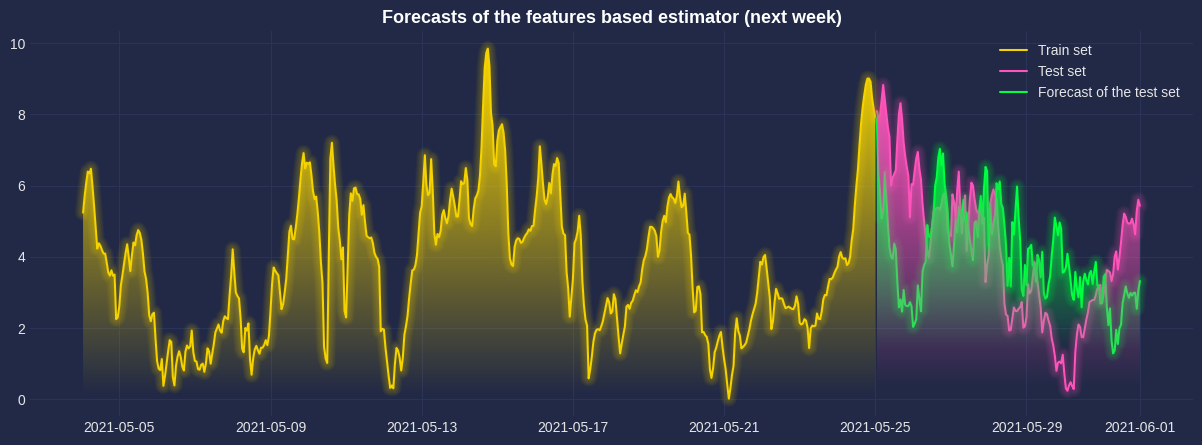

In [ ]:
fcst = estimator_.forecast()
plt.clf()
plt.figure(figsize = (15, 5))
plt.title("Forecasts of the features based estimator (next week)", fontweight = "bold", color = "white", fontsize = 13)
plt.plot(train, label = "Train set", color = "C2")
plt.plot(test, label = "Test set", color = "C1")
plt.plot(fcst, label = "Forecast of the test set", color = "C3")
plt.legend(loc = "upper right")
mplcyberpunk.add_glow_effects(gradient_fill=True)
plt.savefig("plots/forecasts.png", bbox_inches = "tight")

## See a list of 10 rolling features

<Figure size 640x480 with 0 Axes>

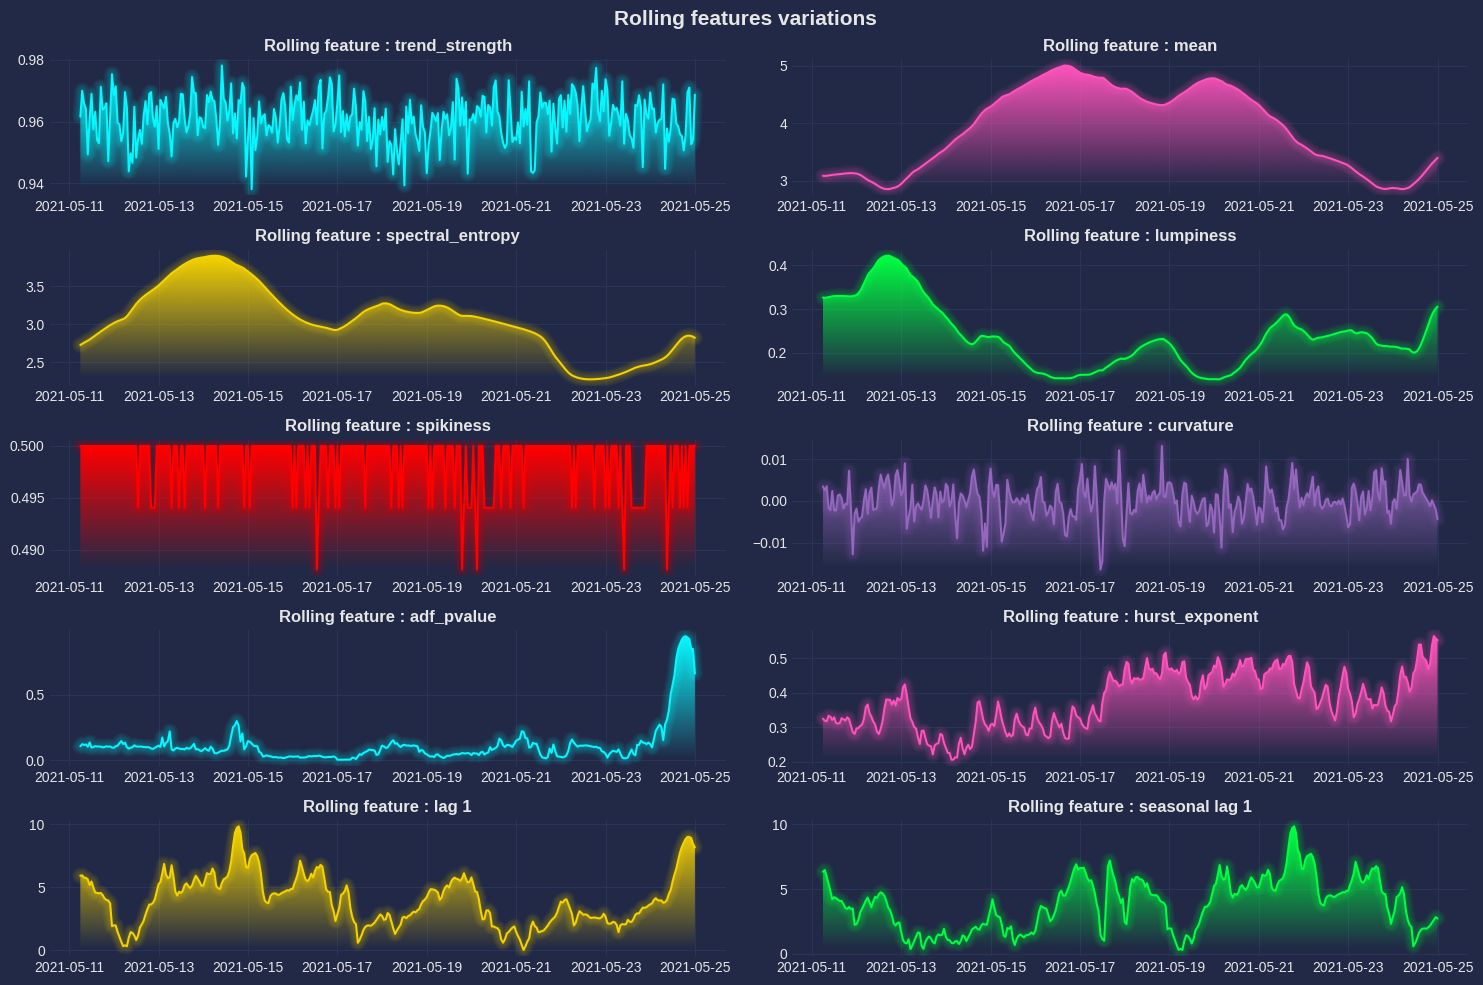

In [ ]:
plt.clf()
estimator_.plot_rolling_features(features_to_plot=["trend_strength",
                                                   "mean",
                                                   "spectral_entropy",
                                                   "lumpiness",
                                                   "spikiness",
                                                   "curvature",
                                                   "adf_pvalue",
                                                   "hurst_exponent",
                                                   "lag 1",
                                                   "seasonal lag 1"],
                                 save_path="plots/rolling_features.png")